<b> Introduction </b>

In combat sports, we often hear the terms height, reach and weight advantage.
It is generally taken as a given that these factors provide a net advantage to the fighter.  However,  data analysis on the subject is lacking.  This notebook attempts to quantify the extent of this.

It has also been noted in various sports that proportions are relevant as well as absolute measures.  In MMA, many people are aware of what this notebook calls  the ape-index.  This compares the fighter's reach (length from fingertip to fingertip with arms outstretched) to their height.  A notable example is the widely considered GOAT (greatest of all time) Jon Jones who is 6'4 (193cm) tall with a reach of 7'0 (213cm). For comparison, a typical man will have a reach that is equal to his height.

This project attempts to quantify the extent of these advantages in MMA, if they exist at all.

<b> Limitations: </b>

-The data is limited to the UFC which is generally consired to be the top tier organization of MMA. 

-This data mostly looks at fights which are restricted to weight classes. Therefore, the differences between fighters are generally small.

-This data looks at fights which were made.  Fights are generally only made when the fighters are of a comparable standard and it is possible for either fighter to win.  This means that physical advantages may often be discriminated against by skill differences in the interest of competiveness.  

<b> To do list </b>


Reach [x]
Height [x]
Weight [x]
Ape index [x]
Varying one factor while holding the others constant

(same as above but restricted to heavyweight because of weight differences)

fight wins, streak, longest streak, [x]

champ correlations [x]
rank filtering[x]
time filtering
buckets[x]
distribution graphs [x]
adding graphics[x]
dividing nicely []
boxing comparison []


<b> Set-Up </b>

In [2]:
###Loading Libraries
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
####Loading Data
df=pd.read_csv("C:/Users/dariu/Desktop/Kaggle/UFC/ufc-master.csv")

####Converting winner/title to binary/numeric values to allow correlation operation
df["Red_wins"]=df["Winner"].apply(lambda x: 1 if x == "Red" else 0)
df["Red_loses"]=df["Winner"].apply(lambda x: 0 if x == "Red" else 1)
df["Red_is_champ"]=df["title_bout"].apply(lambda x: 1 if x == True else 0)


#####Converting win method to binary/numeric finish/no finish
df["finish_win"]=df["finish"]
df["finish_win"].replace(["KO/TKO","SUB"],1, inplace = True)
df["finish_win"].replace(["U-DEC","S-DEC","M-DEC"],0, inplace = True)
df["finish_win"].replace(["DQ","Overturned"],np.NaN, inplace = True)
df["red_finish_win"]=df["finish_win"]
for x in range(len(df)):
    if df.at[x,"Winner"] == "blue":
        df.at[x,"red_finish_win"]=0
        x +=1

##### Setting up binary/numeric check on if fighter if boths fighters are ranked in top 10
df["Top15"]=0
for x in range(len(df)):
    if (df.at[x,"B_match_weightclass_rank"] <=15) & (df.at[x,"R_match_weightclass_rank"] <=15):
        df.at[x,"Top15"]=1


<b>Height</b>

In [4]:
###Height

df["R_Height_adv"]=df["R_Height_cms"]-df["B_Height_cms"]
df_height= df[["R_Height_cms","R_Height_adv", "Red_wins","R_longest_win_streak", "R_current_win_streak", "Red_is_champ","red_finish_win"]]
df_height.corr()

,R_Height_cms,R_Height_adv,Red_wins,R_longest_win_streak,R_current_win_streak,Red_is_champ,red_finish_win
R_Height_cms,1.000000,0.380879,-0.005663,0.110969,0.024510,-0.035978,0.146262
R_Height_adv,0.380879,1.000000,0.034672,-0.001862,0.022734,0.007558,-0.005751
Red_wins,-0.005663,0.034672,1.000000,0.028224,0.062771,0.048975,0.005530
R_longest_win_streak,0.110969,-0.001862,0.028224,1.000000,0.512995,0.269434,0.022176
R_current_win_streak,0.024510,0.022734,0.062771,0.512995,1.000000,0.445515,0.036440
Red_is_champ,-0.035978,0.007558,0.048975,0.269434,0.445515,1.000000,0.021850
red_finish_win,0.146262,-0.005751,0.005530,0.022176,0.036440,0.021850,1.000000


In [5]:
###Height Buckets


bins = np.array([-30,-20,-15,-10,-5,-0.1,0,5,10,15,20,30])
df["R_Height_adv_Buc"] = pd.cut(df["R_Height_adv"], bins)
tableH = pd.pivot_table(df,index="R_Height_adv_Buc",values = ["Red_wins","Red_loses"], aggfunc=np.sum)
tableH["Red_win_%"]=tableH["Red_wins"]/((tableH["Red_wins"])+tableH["Red_loses"])
tableH


,Red_loses,Red_wins,Red_win_%
R_Height_adv_Buc,,,
"(-30.0, -20.0]",2,4,0.666667
"(-20.0, -15.0]",28,33,0.540984
"(-15.0, -10.0]",125,156,0.555160
"(-10.0, -5.0]",359,477,0.570574
"(-5.0, -0.1]",271,395,0.593093
"(-0.1, 0.0]",334,429,0.562254
"(0.0, 5.0]",251,362,0.590538
"(5.0, 10.0]",311,466,0.599743
"(10.0, 15.0]",99,183,0.648936


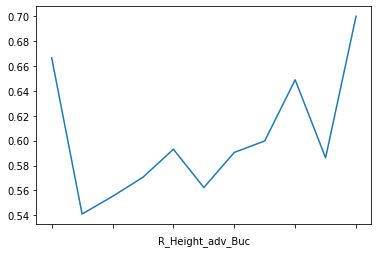

In [6]:
tableH["Red_win_%"].plot()

In [7]:
### Height top 15 only
tableH10 = pd.pivot_table(df,index="R_Height_adv_Buc",values = ["Red_wins","Red_loses"], columns ="Top15", aggfunc=np.sum)
tableH10

Red_loses     Red_wins    
Top15                    0   1        0   1
R_Height_adv_Buc                           
(-30.0, -20.0]           2   0        3   1
(-20.0, -15.0]          22   6       30   3
(-15.0, -10.0]         107  18      130  26
(-10.0, -5.0]          294  65      399  78
(-5.0, -0.1]           218  53      327  68
(-0.1, 0.0]            272  62      350  79
(0.0, 5.0]             217  34      294  68
(5.0, 10.0]            266  45      400  66
(10.0, 15.0]            85  14      158  25
(15.0, 20.0]            20   4       28   6
(20.0, 30.0]             2   1        6   1

In [8]:
####Height champ only

tableHeightChamp = pd.pivot_table(df,index="R_Height_adv_Buc",values = ["Red_wins","Red_loses"], columns ="title_bout", aggfunc=np.sum)
tableHeightChamp["champ_ratio"]=tableHeightChamp["Red_wins"][True]/tableHeightChamp["Red_loses"][True]
tableHeightChamp["ratio"]=tableHeightChamp["Red_wins"][False]/tableHeightChamp["Red_loses"][False]
tableHeightChamp


Red_loses       Red_wins       champ_ratio     ratio
title_bout           False  True    False  True                      
R_Height_adv_Buc                                                     
(-30.0, -20.0]         2.0   NaN      4.0   NaN         NaN  2.000000
(-20.0, -15.0]        27.0   1.0     32.0   1.0    1.000000  1.185185
(-15.0, -10.0]       120.0   5.0    148.0   8.0    1.600000  1.233333
(-10.0, -5.0]        347.0  12.0    450.0  27.0    2.250000  1.296830
(-5.0, -0.1]         260.0  11.0    372.0  23.0    2.090909  1.430769
(-0.1, 0.0]          321.0  13.0    408.0  21.0    1.615385  1.271028
(0.0, 5.0]           245.0   6.0    331.0  31.0    5.166667  1.351020
(5.0, 10.0]          294.0  17.0    438.0  28.0    1.647059  1.489796
(10.0, 15.0]          96.0   3.0    173.0  10.0    3.333333  1.802083
(15.0, 20.0]          24.0   0.0     32.0   2.0         inf  1.333333
(20.0, 30.0]           3.0   NaN      7.0   NaN         NaN  2.333333

In [9]:
####Height by finish
tableHeightFinish = pd.pivot_table(df,index="R_Height_adv_Buc",values = ["Red_wins","Red_loses"], columns ="finish_win", aggfunc=np.sum)
tableHeightFinish["Red_finish%"]=tableHeightFinish["Red_wins"][1]/(tableHeightFinish["Red_wins"][0]+tableHeightFinish["Red_wins"][1])
tableHeightFinish["Blue_finish%"]=tableHeightFinish["Red_loses"][1]/(tableHeightFinish["Red_loses"][0]+tableHeightFinish["Red_loses"][1])
tableHeightFinish

Red_loses      Red_wins      Red_finish% Blue_finish%
finish_win             0.0  1.0      0.0  1.0                         
R_Height_adv_Buc                                                      
(-30.0, -20.0]           1    1        2    2    0.500000     0.500000
(-20.0, -15.0]          13   14       13   18    0.580645     0.518519
(-15.0, -10.0]          53   63       72   79    0.523179     0.543103
(-10.0, -5.0]          164  175      226  231    0.505470     0.516224
(-5.0, -0.1]           124  134      195  177    0.475806     0.519380
(-0.1, 0.0]            166  148      209  195    0.482673     0.471338
(0.0, 5.0]             120  119      154  179    0.537538     0.497908
(5.0, 10.0]            142  151      212  223    0.512644     0.515358
(10.0, 15.0]            52   44       77   91    0.541667     0.458333
(15.0, 20.0]            15    8       15   16    0.516129     0.347826
(20.0, 30.0]             2    1        2    4    0.666667     0.333333

<b>Weight</b>

In [10]:
#### Weight and height at heavyweight
### Weight differences only recorded at heavyweight. All other fighters weigh in at upper limit.

df["R_Weight_adv"]=df["R_Weight_lbs"]-df["B_Weight_lbs"]
df_heavyweight=df[df["weight_class"] == "Heavyweight"]
df_weight= df_heavyweight[["R_Weight_lbs","R_Weight_adv", "R_Height_adv", "Red_wins","R_longest_win_streak", "R_current_win_streak","Red_is_champ", "red_finish_win"]]
df_weight.corr()




,R_Weight_lbs,R_Weight_adv,R_Height_adv,Red_wins,R_longest_win_streak,R_current_win_streak,Red_is_champ,red_finish_win
R_Weight_lbs,1.000000,0.628967,0.146651,0.029767,-0.039970,-0.019712,-0.161852,0.064267
R_Weight_adv,0.628967,1.000000,0.190830,0.097206,-0.062694,0.008019,-0.085644,0.027371
R_Height_adv,0.146651,0.190830,1.000000,0.089095,0.112209,0.068256,0.021010,-0.016391
Red_wins,0.029767,0.097206,0.089095,1.000000,0.006986,-0.034413,-0.024360,0.058772
R_longest_win_streak,-0.039970,-0.062694,0.112209,0.006986,1.000000,0.385404,0.283936,-0.052195
R_current_win_streak,-0.019712,0.008019,0.068256,-0.034413,0.385404,1.000000,0.517538,0.024243
Red_is_champ,-0.161852,-0.085644,0.021010,-0.024360,0.283936,0.517538,1.000000,0.060028
red_finish_win,0.064267,0.027371,-0.016391,0.058772,-0.052195,0.024243,0.060028,1.000000


In [11]:
####Weight Buckets


bins = np.array([-30,-20,-15,-10,-5,-0.1,0,5,10,15,20,30])
df["R_Weight_adv_Buc"] = pd.cut(df["R_Weight_adv"], bins)
tableW = pd.pivot_table(df,index="R_Weight_adv_Buc",values = ["Red_wins","Red_loses"], aggfunc=np.sum)
tableW["Red_win_%"]=tableW["Red_wins"]/((tableW["Red_wins"])+tableW["Red_loses"])
tableW


,Red_loses,Red_wins,Red_win_%
R_Weight_adv_Buc,,,
"(-30.0, -20.0]",56,75,0.572519
"(-20.0, -15.0]",86,97,0.530055
"(-15.0, -10.0]",118,139,0.540856
"(-10.0, -5.0]",13,8,0.380952
"(-5.0, -0.1]",12,13,0.520000
"(-0.1, 0.0]",1228,1734,0.585415
"(0.0, 5.0]",14,22,0.611111
"(5.0, 10.0]",105,180,0.631579
"(10.0, 15.0]",95,144,0.602510


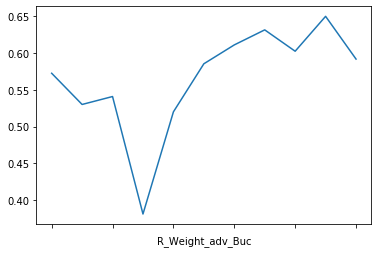

In [12]:
tableW["Red_win_%"].plot()

In [13]:
### Weight top 15 only
tableW15 = pd.pivot_table(df,index="R_Weight_adv_Buc",values = ["Red_wins","Red_loses"], columns ="Top15", aggfunc=np.sum)
tableW15

Red_loses      Red_wins     
Top15                    0    1        0    1
R_Weight_adv_Buc                             
(-30.0, -20.0]          48    8       61   14
(-20.0, -15.0]          72   14       84   13
(-15.0, -10.0]          92   26      110   29
(-10.0, -5.0]            8    5        8    0
(-5.0, -0.1]             9    3        9    4
(-0.1, 0.0]           1040  188     1452  282
(0.0, 5.0]              11    3       14    8
(5.0, 10.0]             84   21      141   39
(10.0, 15.0]            75   20      132   12
(15.0, 20.0]            30    5       59    6
(20.0, 30.0]            13    7       18   11

In [14]:
### Weight champ only
tableWeightChamp = pd.pivot_table(df,index="R_Weight_adv_Buc",values = ["Red_wins","Red_loses"], columns ="title_bout", aggfunc=np.sum)
tableWeightChamp["champ_ratio"]=tableWeightChamp["Red_wins"][True]/tableWeightChamp["Red_loses"][True]
tableWeightChamp["ratio"]=tableWeightChamp["Red_wins"][False]/tableWeightChamp["Red_loses"][False]
tableWeightChamp


Red_loses      Red_wins      champ_ratio     ratio
title_bout           False True    False True                      
R_Weight_adv_Buc                                                   
(-30.0, -20.0]          54    2       68    7    3.500000  1.259259
(-20.0, -15.0]          84    2       94    3    1.500000  1.119048
(-15.0, -10.0]         108   10      124   15    1.500000  1.148148
(-10.0, -5.0]           11    2        8    0    0.000000  0.727273
(-5.0, -0.1]            10    2       13    0    0.000000  1.300000
(-0.1, 0.0]           1197   31     1652   82    2.645161  1.380117
(0.0, 5.0]              12    2       19    3    1.500000  1.583333
(5.0, 10.0]             97    8      163   17    2.125000  1.680412
(10.0, 15.0]            89    6      132   12    2.000000  1.483146
(15.0, 20.0]            34    1       61    4    4.000000  1.794118
(20.0, 30.0]            19    1       23    6    6.000000  1.210526

In [15]:
####Weight by finish
tableWeightFinish = pd.pivot_table(df,index="R_Weight_adv_Buc",values = ["Red_wins","Red_loses"], columns ="finish_win", aggfunc=np.sum)
tableWeightFinish["Red_finish%"]=tableWeightFinish["Red_wins"][1]/(tableWeightFinish["Red_wins"][0]+tableWeightFinish["Red_wins"][1])
tableWeightFinish["Blue_finish%"]=tableWeightFinish["Red_loses"][1]/(tableWeightFinish["Red_loses"][0]+tableWeightFinish["Red_loses"][1])
tableWeightFinish


Red_loses      Red_wins      Red_finish% Blue_finish%
finish_win             0.0  1.0      0.0  1.0                         
R_Weight_adv_Buc                                                      
(-30.0, -20.0]          21   32       28   47    0.626667     0.603774
(-20.0, -15.0]          35   44       44   44    0.500000     0.556962
(-15.0, -10.0]          68   48       68   67    0.496296     0.413793
(-10.0, -5.0]            3   10        3    3    0.500000     0.769231
(-5.0, -0.1]             6    6        4    8    0.666667     0.500000
(-0.1, 0.0]            579  587      838  789    0.484942     0.503431
(0.0, 5.0]               3   10        6   16    0.727273     0.769231
(5.0, 10.0]             61   36       81   86    0.514970     0.371134
(10.0, 15.0]            39   46       67   68    0.503704     0.541176
(15.0, 20.0]            18   15       20   40    0.666667     0.454545
(20.0, 30.0]             9   11        6   21    0.777778     0.550000

<b>Reach</b>

In [16]:
####Reach

df["R_Reach_adv"] = -df["reach_dif"]
df_reach=df[["R_Reach_cms", "B_Reach_cms","R_Reach_adv","Red_wins","R_longest_win_streak", "R_current_win_streak","Red_is_champ","red_finish_win"]]

df_reach.corr()


,R_Reach_cms,B_Reach_cms,R_Reach_adv,Red_wins,R_longest_win_streak,R_current_win_streak,Red_is_champ,red_finish_win
R_Reach_cms,1.000000,0.668630,0.359982,0.012622,0.143428,0.058710,-0.006876,0.148854
B_Reach_cms,0.668630,1.000000,-0.396651,-0.045491,0.117344,0.018184,-0.032966,0.136048
R_Reach_adv,0.359982,-0.396651,1.000000,0.072587,0.019035,0.040571,0.027919,0.020507
Red_wins,0.012622,-0.045491,0.072587,1.000000,0.028224,0.062771,0.048975,0.005530
R_longest_win_streak,0.143428,0.117344,0.019035,0.028224,1.000000,0.512995,0.269434,0.022176
R_current_win_streak,0.058710,0.018184,0.040571,0.062771,0.512995,1.000000,0.445515,0.036440
Red_is_champ,-0.006876,-0.032966,0.027919,0.048975,0.269434,0.445515,1.000000,0.021850
red_finish_win,0.148854,0.136048,0.020507,0.005530,0.022176,0.036440,0.021850,1.000000


In [17]:
####Reach Buckets

bins = np.array([-30,-20,-15,-10,-5,-0.1,0,5,10,15,20,30])
df["R_Reach_adv_Buc"] = pd.cut(df["R_Reach_adv"], bins)
tableR = pd.pivot_table(df,index="R_Reach_adv_Buc",values = ["Red_wins","Red_loses"], aggfunc=np.sum)
tableR["Red_win_%"]=tableR["Red_wins"]/((tableR["Red_wins"])+tableR["Red_loses"])
tableR


,Red_loses,Red_wins,Red_win_%
R_Reach_adv_Buc,,,
"(-30.0, -20.0]",27,15,0.357143
"(-20.0, -15.0]",68,80,0.540541
"(-15.0, -10.0]",182,206,0.530928
"(-10.0, -5.0]",336,449,0.571975
"(-5.0, -0.1]",238,316,0.570397
"(-0.1, 0.0]",218,325,0.598527
"(0.0, 5.0]",245,313,0.560932
"(5.0, 10.0]",272,454,0.625344
"(10.0, 15.0]",133,224,0.627451


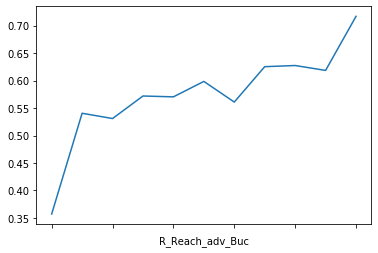

In [18]:
tableR["Red_win_%"].plot()

In [19]:
### Reach top 15 only
tableR15 = pd.pivot_table(df,index="R_Reach_adv_Buc",values = ["Red_wins","Red_loses"], columns ="Top15", aggfunc=np.sum)
tableR15

Red_loses     Red_wins    
Top15                   0   1        0   1
R_Reach_adv_Buc                           
(-30.0, -20.0]         19   8       12   3
(-20.0, -15.0]         56  12       67  13
(-15.0, -10.0]        157  25      186  20
(-10.0, -5.0]         273  63      355  94
(-5.0, -0.1]          199  39      272  44
(-0.1, 0.0]           189  29      260  65
(0.0, 5.0]            204  41      261  52
(5.0, 10.0]           224  48      385  69
(10.0, 15.0]          111  22      190  34
(15.0, 20.0]           61  13      102  18
(20.0, 30.0]           13   2       30   8

In [20]:
### Reach champ only
tableReachChamp = pd.pivot_table(df,index="R_Reach_adv_Buc",values = ["Red_wins","Red_loses"], columns ="title_bout", aggfunc=np.sum)
tableReachChamp["champ_ratio"]=tableReachChamp["Red_wins"][True]/tableReachChamp["Red_loses"][True]
tableReachChamp["ratio"]=tableReachChamp["Red_wins"][False]/tableReachChamp["Red_loses"][False]
tableReachChamp

Red_loses      Red_wins      champ_ratio     ratio
title_bout          False True    False True                      
R_Reach_adv_Buc                                                   
(-30.0, -20.0]         23    4       15    0    0.000000  0.652174
(-20.0, -15.0]         66    2       75    5    2.500000  1.136364
(-15.0, -10.0]        176    6      200    6    1.000000  1.136364
(-10.0, -5.0]         321   15      422   27    1.800000  1.314642
(-5.0, -0.1]          228   10      305   11    1.100000  1.337719
(-0.1, 0.0]           211    7      303   22    3.142857  1.436019
(0.0, 5.0]            238    7      296   17    2.428571  1.243697
(5.0, 10.0]           263    9      420   34    3.777778  1.596958
(10.0, 15.0]          130    3      212   12    4.000000  1.630769
(15.0, 20.0]           72    2      113    7    3.500000  1.569444
(20.0, 30.0]           12    3       29    9    3.000000  2.416667

In [21]:
####Reach by finish
tableReachFinish = pd.pivot_table(df,index="R_Reach_adv_Buc",values = ["Red_wins","Red_loses"], columns ="finish_win", aggfunc=np.sum)
tableReachFinish["Red_finish%"]=tableReachFinish["Red_wins"][1]/(tableReachFinish["Red_wins"][0]+tableReachFinish["Red_wins"][1])
tableReachFinish["Blue_finish%"]=tableReachFinish["Red_loses"][1]/(tableReachFinish["Red_loses"][0]+tableReachFinish["Red_loses"][1])
tableReachFinish



Red_loses      Red_wins      Red_finish% Blue_finish%
finish_win            0.0  1.0      0.0  1.0                         
R_Reach_adv_Buc                                                      
(-30.0, -20.0]         14   12        4   10    0.714286     0.461538
(-20.0, -15.0]         31   37       42   36    0.461538     0.544118
(-15.0, -10.0]         77   97      101   96    0.487310     0.557471
(-10.0, -5.0]         153  163      226  203    0.473193     0.515823
(-5.0, -0.1]          124  101      154  136    0.468966     0.448889
(-0.1, 0.0]           101  102      157  148    0.485246     0.502463
(0.0, 5.0]            121  108      136  159    0.538983     0.471616
(5.0, 10.0]           112  142      195  227    0.537915     0.559055
(10.0, 15.0]           78   51      100  114    0.532710     0.395349
(15.0, 20.0]           31   41       46   62    0.574074     0.569444
(20.0, 30.0]           10    5       13   21    0.617647     0.333333

<b>Ape Index</b>

In [22]:
### Is the Ape Index a significant factor? (having long arms vs height) ###

#####Creating columns that generate fighter's ape indices (ratio of height to reach).
#### "AI diff" represents the difference between the two fighters.

df["R_ape_index"]=df["R_Reach_cms"]/df["R_Height_cms"]
df["B_ape_index"]=df["B_Reach_cms"]/df["B_Height_cms"]
df["R_AI_adv"]=df["R_ape_index"]/df["B_ape_index"]

###Creating smaller data frame
df_ape=df[["R_AI_adv","R_ape_index","Red_wins","R_longest_win_streak", "R_current_win_streak","Red_is_champ","red_finish_win"]]

df_ape.corr()

,R_AI_adv,R_ape_index,Red_wins,R_longest_win_streak,R_current_win_streak,Red_is_champ,red_finish_win
R_AI_adv,1.000000,0.677454,0.054655,0.039690,0.034709,0.036504,0.031716
R_ape_index,0.677454,1.000000,0.036941,0.108148,0.082029,0.049200,0.054787
Red_wins,0.054655,0.036941,1.000000,0.028224,0.062771,0.048975,0.005530
R_longest_win_streak,0.039690,0.108148,0.028224,1.000000,0.512995,0.269434,0.022176
R_current_win_streak,0.034709,0.082029,0.062771,0.512995,1.000000,0.445515,0.036440
Red_is_champ,0.036504,0.049200,0.048975,0.269434,0.445515,1.000000,0.021850
red_finish_win,0.031716,0.054787,0.005530,0.022176,0.036440,0.021850,1.000000


In [23]:
AIbins = np.array([0.8,0.9,0.925, 0.95,0.975,1,1.025,1.05,1.075,1.1,1.2,])
df["R_ape_index_Buc"] = pd.cut(df["R_ape_index"], bins)
tableAI = pd.pivot_table(df,index="R_ape_index_Buc",values = ["Red_wins","Red_loses"],columns="title_bout", aggfunc=np.sum)
tableAI["Red_champ_win_%"]=tableAI["Red_wins"][True]/((tableAI["Red_wins"][True])+tableAI["Red_loses"][True])
tableAI["Red_non-champ_win_%"]=tableAI["Red_wins"][False]/((tableAI["Red_wins"][False])+tableAI["Red_loses"][False])
tableAI

Red_loses      Red_wins      Red_champ_win_%  \
title_bout          False True    False True                   
R_ape_index_Buc                                                
(0.0, 5.0]           1741   68     2395  151        0.689498   

                Red_non-champ_win_%  
title_bout                           
R_ape_index_Buc                      
(0.0, 5.0]                 0.579062

In [24]:
#### Is Ape Index an advantage?  All fights

bins = np.array([0.8,0.9,0.925, 0.95,0.975,1,1.025,1.05,1.075,1.1,1.2,])
df["R_AI_adv_Buc"] = pd.cut(df["R_AI_adv"], bins)
tableAIA = pd.pivot_table(df,index="R_AI_adv_Buc",values = ["Red_wins","Red_loses"], aggfunc=np.sum)
tableAIA["Red_win_%"]=tableAIA["Red_wins"]/((tableAIA["Red_wins"])+tableAIA["Red_loses"])
tableAIA


,Red_loses,Red_wins,Red_win_%
R_AI_adv_Buc,,,
"(0.8, 0.9]",3,3,0.500000
"(0.9, 0.925]",25,27,0.519231
"(0.925, 0.95]",121,128,0.514056
"(0.95, 0.975]",343,481,0.583738
"(0.975, 1.0]",462,612,0.569832
"(1.0, 1.025]",389,537,0.579914
"(1.025, 1.05]",334,514,0.606132
"(1.05, 1.075]",103,178,0.633452
"(1.075, 1.1]",22,48,0.685714


In [25]:
tableA["Red_win_%"].plot()

NameError: name 'tableA' is not defined

In [ ]:
### AI top 15 only
tableAI15 = pd.pivot_table(df,index="R_AI_adv_Buc",values = ["Red_wins","Red_loses"], columns ="Top15", aggfunc=np.sum)
tableAI15["T15_ratio"]=tableAI15["Red_wins"][1]/tableAI15["Red_loses"][1]
tableAI15["ratio"]=tableAI15["Red_wins"][0]/tableAI15["Red_loses"][0]
tableAI15

In [ ]:
### AI champ only
tableAIChamp = pd.pivot_table(df,index="R_AI_adv_Buc",values = ["Red_wins","Red_loses"], columns ="title_bout", aggfunc=np.sum)
tableAIChamp["champ_ratio"]=tableAIChamp["Red_wins"][True]/tableAIChamp["Red_loses"][True]
tableAIChamp["ratio"]=tableAIChamp["Red_wins"][False]/tableAIChamp["Red_loses"][False]
tableAIChamp

In [ ]:
####AI by finish
tableAIFinish = pd.pivot_table(df,index="R_AI_adv_Buc",values = ["Red_wins","Red_loses"], columns ="finish_win", aggfunc=np.sum)
tableAIFinish["Red_finish%"]=tableAIFinish["Red_wins"][1]/(tableAIFinish["Red_wins"][0]+tableAIFinish["Red_wins"][1])
tableAIFinish["Blue_finish%"]=tableAIFinish["Red_loses"][1]/(tableAIFinish["Red_loses"][0]+tableAIFinish["Red_loses"][1])
tableAIFinish


<b> Conclusion </b>

Do physicals affect win?
Do physicals affect win streaks?
Do physicals affect win method?
Do physicals affect champ status?
Does win streak predict success?
Is there a difference between the top 15 and non ranked people?
Is there a difference between champs and non champs?


In [ ]:
df["R_Height_cms"].describe()

In [ ]:
### Profit on betting £100 on the red corner over 4328 fights
sum = 0
for x in range(len(df)):

    sum -= 100
    if df.at[x,"Winner"]=="Red":
        if df.at[x,"R_odds"]>0:
            sum +=(df.at[x,"R_odds"])
        elif df.at[x,"R_odds"]<0:
            sum +=(100+(-10000/df.at[x,"R_odds"]))

print(sum)

In [ ]:
### Profit on betting £100 on the blue corner over 4328 fights
sum = 0
for x in range(len(df)):

    sum -= 100
    if df.at[x,"Winner"]=="Blue":
        if df.at[x,"B_odds"]>0:
            sum +=(df.at[x,"B_odds"])
        elif df.at[x,"B_odds"]<0:
            sum +=(100+(-10000/df.at[x,"B_odds"]))

print(sum)

In [ ]:
df["R_avg_TD_landed"].desc()